In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = np.zeros((3, 3), dtype=np.uint8)
img

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [4]:
# convert to blue-green-red
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

## Read and write image files

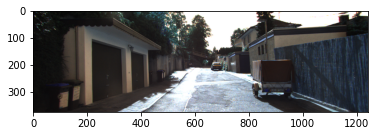

In [5]:
image = cv2.imread('mypic.png')
# cv2.imwrite('mypic.png', image)
plt.imshow(image)

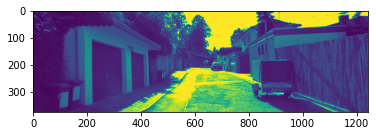

In [6]:
grayImage = cv2.imread('mypic.png', cv2.IMREAD_GRAYSCALE)
# cv2.imwrite('mypic.png', grayImage)
plt.imshow(grayImage)

## Create OpenCV image from random byte array

In [7]:
import os

# Generate random bytes with os.unrandom, transform it into a byte array and then a numpy array
randomByteArray = bytearray(os.urandom(120000))
flatNumpyArray = np.array(randomByteArray)

# Reshape the flat 1-D array into a 2-D array
grayImg = flatNumpyArray.reshape(300, 400)
cv2.imwrite('rand_gray.png', grayImg)

# Reshape the flat 1-D array into a 3-D array
bgrImg = flatNumpyArray.reshape(100, 400, 3)
cv2.imwrite('rand_color.png', bgrImg)

True

## Image Manipulation

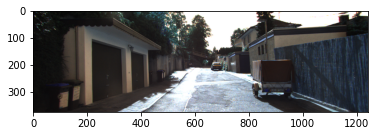

In [8]:
img = cv2.imread('mypic.png')
# Change top-left pixel to white
img[0, 0] = [255, 255, 255]
cv2.imwrite('modified_mypic.png', img)
plt.imshow(img)

In [9]:
# Using ndarray.item and ndarray.itemset
img2 = cv2.imread('mypic.png')
img.itemset((150, 120, 0), 255)
print(img.item(150, 120, 0))

255


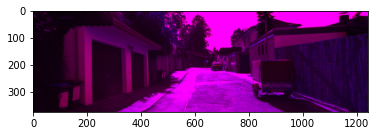

In [10]:
# Using array slicing to change multiple pixels
img3 = cv2.imread('mypic.png')
img3[:, :, 1] = 0 # change all green values of an image to 0
plt.imshow(img3)

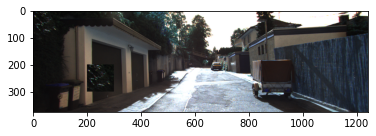

In [11]:
img4 = cv2.imread('mypic.png')
my_roi = img4[0:100, 0:100]
img4[200:300, 200:300] = my_roi
cv2.imwrite('m_mypic.png', img4)
plt.imshow(img4)

## Reading/Writing a Video file

Pay attention to the second argument of `VideoWriter` constructor. It's for the video codec. The supported options may include the following:
- `0` : This option is an uncompressed raw video file. The file extension should
be .avi .
- `cv2.VideoWriter_fourcc('I','4','2','0')` : This option is an
uncompressed YUV encoding, 4:2:0 chroma subsampled. This encoding is widely
compatible but produces large files. The file extension should be .avi .
- `cv2.VideoWriter_fourcc('P','I','M','1')` : This option is MPEG-1. The
file extension should be .avi.
- `cv2.VideoWriter_fourcc('X','V','I','D')` : This option is a relatively old
MPEG-4 encoding. It is a good option if you want to limit the size of the resulting
video. The file extension should be .avi .
- `cv2.VideoWriter_fourcc('M','P','4','V')` : This option is another
relatively old MPEG-4 encoding. It is a good option if you want to limit the size
of the resulting video. The file extension should be .mp4 .
- `cv2.VideoWriter_fourcc('X','2','6','4')` : This option is a relatively
new MPEG-4 encoding. It may be the best option if you want to limit the size of
the resulting video. The file extension should be .mp4 .
- `cv2.VideoWriter_fourcc('T','H','E','O')` : This option is Ogg Vorbis.
The file extension should be .ogv .
- `cv2.VideoWriter_fourcc('F','L','V','1')` : This option is a Flash video.
The file extension should be .flv .

In [12]:
video_file = 'drop.avi'
output_video_file = 'm_myvideo.avi'

videoCapture = cv2.VideoCapture(video_file)
fps = videoCapture.get(cv2.CAP_PROP_FPS)
size = (int(videoCapture.get(cv2.CAP_PROP_FRAME_WIDTH)), int(videoCapture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
videoWriter = cv2.VideoWriter(output_video_file, cv2.VideoWriter_fourcc('I', '4', '2', '0'), fps, size)

# Read frames from a video file and write the frames to another file
success, frame = videoCapture.read()
while success:
    videoWriter.write(frame)
    success, frame = videoCapture.read()

## Display an image

In [13]:
show_img = cv2.imread('mypic.png')
# cv2.imshow('my image', show_img)
# cv2.waitKey()
# cv2.destroyAllWindows()